In [ ]:
!pip install gdown

## Importing and reading

In [ ]:
import gdown
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from ast import literal_eval
from collections import Counter
import warnings
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
credits_id = '1OgAdH8h-8gBTh3IvZAKkfilgJ7NP_PYJ'
gdown.download(f'https://drive.google.com/uc?id={credits_id}', 'credits.csv')
credits = pd.read_csv('credits.csv')

keywords_id = '1pwuGPB-f8sX0HBZm4lXIjwVNxpgBM6EE'
gdown.download(f'https://drive.google.com/uc?id={keywords_id}', 'keywords.csv')
keywords = pd.read_csv('keywords.csv')

links_small_id = '1CeVsfXl2MHqunJXJsPhGKg9EqT5rWNhq'
gdown.download(f'https://drive.google.com/uc?id={links_small_id}', 'links_small.csv')
links_small = pd.read_csv('links_small.csv')

movies_metadata_id = '1fiKyla5QlCGq1ERb5IT7GlDVxehkLK0P'
gdown.download(f'https://drive.google.com/uc?id={movies_metadata_id}', 'movies_metadata.csv')
metadata = pd.read_csv('movies_metadata.csv')

ratings_small_id = '1rVEKuncfTQUeS8eTzT_TxThskkCqeppV'
gdown.download(f'https://drive.google.com/uc?id={ratings_small_id}', 'ratings_small.csv')
ratings_small = pd.read_csv('ratings_small.csv')

Downloading...
From: https://drive.google.com/uc?id=1OgAdH8h-8gBTh3IvZAKkfilgJ7NP_PYJ
To: /content/credits.csv
100%|██████████| 190M/190M [00:01<00:00, 140MB/s]
Downloading...
From: https://drive.google.com/uc?id=1pwuGPB-f8sX0HBZm4lXIjwVNxpgBM6EE
To: /content/keywords.csv
100%|██████████| 6.23M/6.23M [00:00<00:00, 119MB/s]
Downloading...
From: https://drive.google.com/uc?id=1CeVsfXl2MHqunJXJsPhGKg9EqT5rWNhq
To: /content/links_small.csv
100%|██████████| 183k/183k [00:00<00:00, 34.8MB/s]
Downloading...
From: https://drive.google.com/uc?id=1fiKyla5QlCGq1ERb5IT7GlDVxehkLK0P
To: /content/movies_metadata.csv
100%|██████████| 34.4M/34.4M [00:00<00:00, 199MB/s]
<ipython-input-39-abd0b2a9971a>:15: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  metadata = pd.read_csv('movies_metadata.csv')
Downloading...
From: https://drive.google.com/uc?id=1rVEKuncfTQUeS8eTzT_TxThskkCqeppV
To: /content/ratings_small.csv
100%|██████████| 2.44M/2.44M [00:00<

In [ ]:
#to display the entire dataframe
pd.set_option('display.max_columns', None)

In [ ]:
print("number of rows for credits: ", credits.shape[0])
print("number of rows for keywords: ", keywords.shape[0])
print("number of rows for links_small: ", links_small.shape[0])
print("number of rows for metadata: ", metadata.shape[0])
print("number of rows for ratings_small: ", ratings_small.shape[0])

number of rows for credits:  45476
number of rows for keywords:  46419
number of rows for links_small:  9125
number of rows for metadata:  45466
number of rows for ratings_small:  100004


We will be using the small dataset for links and ratings due to space constraints.

In [ ]:
credits.head()

,cast,crew,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357
4,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862


In [ ]:
keywords.head()

,id,keywords
0,862,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."
1,8844,"[{'id': 10090, 'name': 'board game'}, {'id': 1..."
2,15602,"[{'id': 1495, 'name': 'fishing'}, {'id': 12392..."
3,31357,"[{'id': 818, 'name': 'based on novel'}, {'id':..."
4,11862,"[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n..."


In [ ]:
links_small.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [ ]:
metadata.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.387519,/e64sOI48hQXyru7naBFyssKFxVd.jpg,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [ ]:
ratings_small.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


## Details of each table and its columns


credits df:
- cast: str of one list that contains dictionaries of each cast member and their details
- crew: str of one list that contains dictionaries of each crew member and their details
- id: int tmdb id to get the movie name


keywords df:
- keywords: str of one list that contains dictionaries of each keywords of the movie with its id
- id: int tmdb id to get the movie name


links_df:
- the link table for a movie name, tmdb id and imdb id


ratings_df:
- userId: int to identify a user
- movieId: int tmdb id of a movie
- rating: float rating out of 5
- timestamp: epoch unix timestamp of user rating


movies_df:
- adult: str where True if is an adult movie False otherwise
- belongs_to_collection: one list that contains a dictionary of id, name, poster path and backdrop path
- budget: int of movie budget
- genres: str of one list that contains a dictionary of each movie's genre with its id
- homepage: str URL of homepage
- id: int tmdb id
- imdb_id: int imdb id
- original_language: str of language
- original_title: str title of the movie before translation or adaptation
- overview: str of movie overview
- popularity: float of movie popularity
- poster_path: path of the movie poster
- production_companies: str of one list that contains a dictionary of company and its id
- production_countries: str of one list that contains a dictionary of countries and its ISO-3166-1
- release_date: str in YYYY-MM-DD format
- revenue: int of worldwide revenue generated
- runtime: float running time of movie in minutes
- spoken_languages: str of one list that contains a dictionary of countries and its ISO-3166-1
- status: str that contains released or rumoured
- tagline: str of movie tagline
- title: str of movie title
- video: str where True if video False otherwise
- vote_average: float of average rating that the movie received
- vote_count: int of total votes movie received

## Checking for missing data

In [ ]:
print('For credits: ')
print(credits.isnull().sum())
print(' ')

print('For keywords: ')
print(keywords.isnull().sum())
print(' ')

print('For links_small: ')
print(links_small.isnull().sum())
print(' ')

print('for metadata: ')
print(metadata.isnull().sum())
print(' ')

print('for ratings_small:')
print(ratings_small.isnull().sum())
print(' ')

For credits: 
cast    0
crew    0
id      0
dtype: int64
 
For keywords: 
id          0
keywords    0
dtype: int64
 
For links_small: 
movieId     0
imdbId      0
tmdbId     13
dtype: int64
 
for metadata: 
adult                        0
belongs_to_collection    40972
budget                       0
genres                       0
homepage                 37684
id                           0
imdb_id                     17
original_language           11
original_title               0
overview                   954
popularity                   5
poster_path                386
production_companies         3
production_countries         3
release_date                87
revenue                      6
runtime                    263
spoken_languages             6
status                      87
tagline                  25054
title                        6
video                        6
vote_average                 6
vote_count                   6
dtype: int64
 
for ratings_small:
userId       0


## Checking the data type distribution

In [ ]:
credits.dtypes.to_dict()

{'cast': dtype('O'), 'crew': dtype('O'), 'id': dtype('int64')}

In [ ]:
keywords.dtypes.to_dict()

{'id': dtype('int64'), 'keywords': dtype('O')}

In [ ]:
links_small.dtypes.to_dict()

{'movieId': dtype('int64'),
 'imdbId': dtype('int64'),
 'tmdbId': dtype('float64')}

In [ ]:
ratings_small.dtypes.to_dict()

{'userId': dtype('int64'),
 'movieId': dtype('int64'),
 'rating': dtype('float64'),
 'timestamp': dtype('int64')}

In [ ]:
metadata.dtypes.to_dict()

{'adult': dtype('O'),
 'belongs_to_collection': dtype('O'),
 'budget': dtype('O'),
 'genres': dtype('O'),
 'homepage': dtype('O'),
 'id': dtype('O'),
 'imdb_id': dtype('O'),
 'original_language': dtype('O'),
 'original_title': dtype('O'),
 'overview': dtype('O'),
 'popularity': dtype('O'),
 'poster_path': dtype('O'),
 'production_companies': dtype('O'),
 'production_countries': dtype('O'),
 'release_date': dtype('O'),
 'revenue': dtype('float64'),
 'runtime': dtype('float64'),
 'spoken_languages': dtype('O'),
 'status': dtype('O'),
 'tagline': dtype('O'),
 'title': dtype('O'),
 'video': dtype('O'),
 'vote_average': dtype('float64'),
 'vote_count': dtype('float64')}

## Checking for invalid data

In [ ]:
#checking which rows have invalid data in movies_df
non_numeric_rows_budget = metadata[~metadata['budget'].apply(pd.to_numeric, errors='coerce').notna()]
non_numeric_rows_budget

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
19730,- Written by Ørnås,0.065736,/ff9qCepilowshEtG2GYWwzt2bs4.jpg,"[{'name': 'Carousel Productions', 'id': 11176}...","[{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso...",1997-08-20,0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Midnight Man,False,6.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29503,Rune Balot goes to a casino connected to the ...,1.931659,/zV8bHuSL6WXoD6FWogP9j4x80bL.jpg,"[{'name': 'Aniplex', 'id': 2883}, {'name': 'Go...","[{'iso_3166_1': 'US', 'name': 'United States o...",2012-09-29,0,68.0,"[{'iso_639_1': 'ja', 'name': '日本語'}]",Released,NaN,Mardock Scramble: The Third Exhaust,False,7.0,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35587,Avalanche Sharks tells the story of a bikini ...,2.185485,/zaSf5OG7V8X8gqFvly88zDdRm46.jpg,"[{'name': 'Odyssey Media', 'id': 17161}, {'nam...","[{'iso_3166_1': 'CA', 'name': 'Canada'}]",2014-01-01,0,82.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Beware Of Frost Bites,Avalanche Sharks,False,4.3,22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We will be removing these rows from this dataset

In [ ]:
metadata = metadata.drop([19730, 29503, 35587])

## Converting data types

Since genres, keywords, cast and crew are strings of dictionaries, we will be converting them to dictionaries.

In [ ]:
metadata['genres'] = metadata['genres'].apply(literal_eval)
keywords['keywords'] = keywords['keywords'].apply(literal_eval)
credits['cast'] = credits['cast'].apply(literal_eval)
credits['crew'] = credits['crew'].apply(literal_eval)

Budget and popularity should be float as they represent numerical values.

In [ ]:
metadata['budget'] = metadata['budget'].astype('float')
metadata['popularity'] = metadata['popularity'].astype('float')

The id in movies_df should be float as it represents the tmbd id in links_small which is of float type as well.

In [ ]:
metadata['id'] = metadata['id'].astype('float')

## Checking for duplicates

In [ ]:
cred_dup = credits['id'].duplicated()
cred_dup = credits[cred_dup]
cred_dup

,cast,crew,id
1465,"[{'cast_id': 5, 'character': 'Sophie II', 'cre...","[{'credit_id': '52fe4a44c3a36847f81c463f', 'de...",105045
9165,"[{'cast_id': 11, 'character': 'Jef Costello', ...","[{'credit_id': '52fe440ac3a36847f807ee01', 'de...",5511
9327,"[{'cast_id': 1, 'character': 'Lafcadia - Warri...","[{'credit_id': '52fe4465c3a368484e02091d', 'de...",23305
12066,"[{'cast_id': 1000, 'character': 'Martha', 'cre...","[{'credit_id': '52fe46199251416c7506d0ff', 'de...",14788
13375,"[{'cast_id': 1, 'character': 'Pekka', 'credit_...","[{'credit_id': '52fe4ac89251416c750edd47', 'de...",141971
15074,"[{'cast_id': 1, 'character': 'Catherine Barkle...","[{'credit_id': '56d73d3e9251414291002436', 'de...",22649
15765,"[{'cast_id': 4, 'character': '', 'credit_id': ...","[{'credit_id': '52fe454f9251416c75052209', 'de...",13209
16764,"[{'cast_id': 1, 'character': 'Pekka', 'credit_...","[{'credit_id': '52fe4ac89251416c750edd47', 'de...",141971
20842,"[{'cast_id': 2, 'character': 'Sultan Amar', 'c...","[{'credit_id': '52fe4962c3a368484e1289fd', 'de...",77221
20898,"[{'cast_id': 1, 'character': 'Liz Hamilton', '...","[{'credit_id': '52fe4ac8c3a36847f81e1445', 'de...",109962


In [ ]:
keywords_dup = keywords['id'].duplicated()
keywords_dup = keywords[keywords_dup]
keywords_dup

,id,keywords
1465,105045,"[{'id': 7059, 'name': 'anti-communism'}, {'id'..."
9165,5511,"[{'id': 90, 'name': 'paris'}, {'id': 1010, 'na..."
9327,23305,[]
12066,14788,"[{'id': 9826, 'name': 'murder'}, {'id': 10183,..."
13375,141971,[]
...,...,...
40994,298721,"[{'id': 1227, 'name': 'cemetery'}, {'id': 1261..."
41230,97995,[]
45774,10991,"[{'id': 1262, 'name': 'mountain'}, {'id': 2802..."
45779,12600,"[{'id': 9663, 'name': 'sequel'}, {'id': 11451,..."


In [ ]:
links_dup = links_small['tmdbId'].duplicated()
links_dup = links_small[links_dup]
links_dup

,movieId,imdbId,tmdbId
608,721,114103,NaN
640,769,116992,NaN
910,1133,111357,NaN
2282,2851,81454,NaN
3246,4051,56600,NaN
5826,26587,92337,NaN
7408,72781,1104746,NaN
7438,73759,495212,NaN
7588,79299,874957,NaN
8045,94466,2085059,NaN


In [ ]:
movies_dup = metadata['id'].duplicated()
movies_dup = metadata[movies_dup]
movies_dup

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
1465,False,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",NaN,105045.0,tt0111613,de,Das Versprechen,"East-Berlin, 1961, shortly after the erection ...",0.122178,/5WFIrBhOOgc0jGmoLxMZwWqCctO.jpg,"[{'name': 'Studio Babelsberg', 'id': 264}, {'n...","[{'iso_3166_1': 'DE', 'name': 'Germany'}]",1995-02-16,0.0,115.0,"[{'iso_639_1': 'de', 'name': 'Deutsch'}]",Released,"A love, a hope, a wall.",The Promise,False,5.0,1.0
9165,False,NaN,0.0,"[{'id': 80, 'name': 'Crime'}, {'id': 18, 'name...",NaN,5511.0,tt0062229,fr,Le Samouraï,Hitman Jef Costello is a perfectionist who alw...,9.091288,/cvNW8IXigbaMNo4gKEIps0NGnhA.jpg,"[{'name': 'Fida cinematografica', 'id': 73}, {...","[{'iso_3166_1': 'FR', 'name': 'France'}, {'iso...",1967-10-25,39481.0,105.0,"[{'iso_639_1': 'fr', 'name': 'Français'}]",Released,There is no solitude greater than that of the ...,Le Samouraï,False,7.9,187.0
9327,False,NaN,0.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 16, '...",NaN,23305.0,tt0295682,en,The Warrior,"In feudal India, a warrior (Khan) who renounce...",1.967992,/9GlrmbZO7VGyqhaSR1utinRJz3L.jpg,"[{'name': 'Filmfour', 'id': 6705}]","[{'iso_3166_1': 'FR', 'name': 'France'}, {'iso...",2001-09-23,0.0,86.0,"[{'iso_639_1': 'hi', 'name': 'हिन्दी'}]",Released,NaN,The Warrior,False,6.3,15.0
12066,False,NaN,1600000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 80, 'name...",http://www.bubblethefilm.com/,14788.0,tt0454792,en,Bubble,Set against the backdrop of a decaying Midwest...,3.008299,/w56oo9nREcF54sNXVYuE9QxZFjT.jpg,"[{'name': 'Magnolia Pictures', 'id': 1030}, {'...","[{'iso_3166_1': 'US', 'name': 'United States o...",2005-09-03,0.0,73.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Bubble,False,6.4,36.0
13375,False,NaN,0.0,"[{'id': 53, 'name': 'Thriller'}, {'id': 9648, ...",NaN,141971.0,tt1180333,fi,Blackout,Recovering from a nail gun shot to the head an...,0.411949,/8VSZ9coCzxOCW2wE2Qene1H1fKO.jpg,"[{'name': 'Filmiteollisuus Fine', 'id': 5166}]","[{'iso_3166_1': 'FI', 'name': 'Finland'}]",2008-12-26,0.0,108.0,"[{'iso_639_1': 'fi', 'name': 'suomi'}]",Released,Which one is the first to return - memory or t...,Blackout,False,6.7,3.0
15074,False,NaN,4.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",NaN,22649.0,tt0022879,en,A Farewell to Arms,British nurse Catherine Barkley (Helen Hayes) ...,2.411191,/k0MF0IIbJ2PfOIku2KyraXL72d8.jpg,"[{'name': 'Paramount Pictures', 'id': 4}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1932-12-08,25.0,89.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Every woman who has loved will understand,A Farewell to Arms,False,6.2,29.0
15765,False,NaN,2500.0,"[{'id': 18, 'name': 'Drama'}, {'id': 35, 'name...",NaN,13209.0,tt0499537,fa,Offside,"Since women are banned from soccer matches, Ir...",1.529879,/nfkOkpudNNIjRrf0mTFVoiGzHyc.jpg,"[{'name': 'Jafar Panahi Film Productions', 'id...","[{'iso_3166_1': 'IR', 'name': 'Iran'}]",2006-05-26,0.0,93.0,"[{'iso_639_1': 'fa', 'name': 'فارسی'}]",Released,NaN,Offside,False,6.7,27.0
16764,False,NaN,0.0,"[{'id': 53, 'name': 'Thriller'}, {'id': 9648, ...",NaN,141971.0,tt1180333,fi,Blackout,Recovering from a nail gun shot to the head an...,0.411949,/8VSZ9coCzxOCW2wE2Qene1H1fKO.jpg,"[{'name': 'Filmiteollisuus Fine', 'id': 5166}]","[{'iso_3166_1': 'FI', 'name': 'Finland'}]",2008-12-26,0.0,108.0,"[{'iso_639_1': 'fi', 'name': 'suomi'}]",Released,Which one is the first to return - memory or t...,Blackout,False,6.7,3.0
20843,False,NaN,40000000.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 18, '...",NaN,77221.0,tt1701210,en,Black Gold,"On the Arabian Peninsula in the 1930s, two war...",6.475665,/iQd7zWhSeCe3cgdPcLIDXjGfdzL.jpg,"[{'name': 'France 2 Cinéma', 'id': 83}, {'name...","[{'iso_3166_1': 'FR', 'name': 'France'}, {'i

We will be removing the duplicates from the above tables. Ratings is not included as even though the composite key will be userId and movieId, the same user might rerate the movie at a later time.

In [ ]:
credits = credits.drop_duplicates(subset='id')
keywords = keywords.drop_duplicates(subset='id')
links_small = links_small.drop_duplicates(subset='tmdbId')
metadata = metadata.drop_duplicates(subset='id')

Since we will only be considering the movies in links_small and ratings_small, the remaining movies are considered redundant and will be removed.

In [ ]:
metadata = metadata[metadata['id'].isin(links_small['tmdbId'])]

## Converting preprocessed dataframes into CSV files

These files can be found in google drive.

In [ ]:
credits.to_csv('credits_preprocessed.csv', index=False)
!cp credits_preprocessed.csv /content/

cp: 'credits_preprocessed.csv' and '/content/credits_preprocessed.csv' are the same file


In [ ]:
keywords.to_csv('keywords_preprocessed.csv', index=False)
!cp keywords_preprocessed.csv /content/

cp: 'keywords_preprocessed.csv' and '/content/keywords_preprocessed.csv' are the same file


In [ ]:
links_small.to_csv('links_small_preprocessed.csv', index=False)
!cp links_small_preprocessed.csv /content/

cp: 'links_small_preprocessed.csv' and '/content/links_small_preprocessed.csv' are the same file


In [ ]:
ratings_small.to_csv('ratings_small_preprocessed.csv', index=False)
!cp ratings_small_preprocessed.csv /content/

cp: 'ratings_small_preprocessed.csv' and '/content/ratings_small_preprocessed.csv' are the same file


In [ ]:
metadata.to_csv('movies_metadata_preprocessed.csv', index=False)
!cp movies_metadata_preprocessed.csv /content/

cp: 'movies_metadata_preprocessed.csv' and '/content/movies_metadata_preprocessed.csv' are the same file


# EDA for Numerical Data

### Descriptive statistics of all the numerical columns in metadata

In [ ]:
metadata.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,9.082000e+03,9082.000000,9082.000000,9.082000e+03,9082.000000,9082.000000,9082.000000
mean,1.664789e+07,38710.463885,7.268905,4.918728e+07,105.661418,6.362178,439.050870
std,3.345276e+07,62123.411079,9.372314,1.301801e+08,30.350712,1.038748,996.156492
min,0.000000e+00,2.000000,0.000004,0.000000e+00,0.000000,0.000000,0.000000
25%,0.000000e+00,9446.250000,2.954521,0.000000e+00,93.000000,5.800000,29.000000
50%,1.000000e+05,15775.000000,6.418871,2.716080e+05,102.000000,6.500000,96.000000
75%,2.000000e+07,39010.250000,9.861742,3.672528e+07,115.000000,7.000000,365.750000
max,3.800000e+08,416437.000000,547.488298,2.787965e+09,1140.000000,10.000000,14075.000000


### Top 20 Films by Popularity (according to tmDb)
We can see that Minions, Big Hero 6, Deadpool are the top 3 most popular movies, and I am sure that most of us have heard of them before too.

In [ ]:
metadata = metadata.sort_values('popularity', ascending=False)
metadata [['title', 'vote_count', 'vote_average', 'popularity']].head(15)

,title,vote_count,vote_average,popularity
30700,Minions,4729.0,6.4,547.488298
24455,Big Hero 6,6289.0,7.8,213.849907
26564,Deadpool,11444.0,7.4,187.860492
14551,Avatar,12114.0,7.2,185.070892
24351,John Wick,5499.0,7.0,183.870374
23675,Gone Girl,6023.0,7.9,154.801009
24873,The Hunger Games: Mockingjay - Part 1,5767.0,6.6,147.098006
26567,Captain America: Civil War,7462.0,7.1,145.882135
292,Pulp Fiction,8670.0,8.3,140.950236
12481,The Dark Knight,12269.0,8.3,123.167259


### Top 10 Film Genre
Drama, Comedy and Thriller are the top 3 film genres.

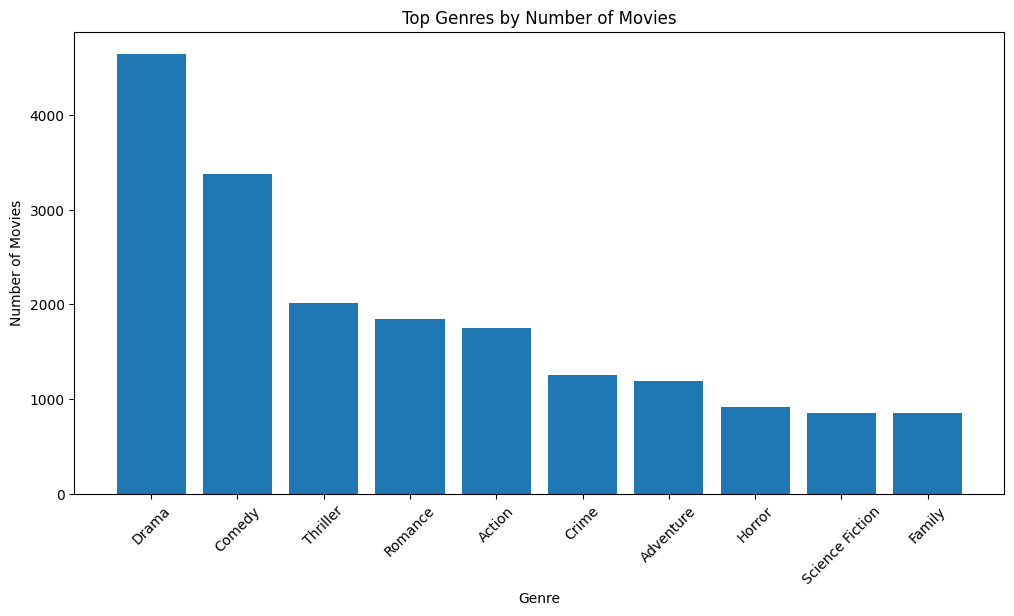

In [ ]:
def count_genres(df, column_name='genres'):
    genre_count = Counter()
    for row in df[column_name]:
        if isinstance(row, list):
            genres = [genre_dict['name'] for genre_dict in row if 'name' in genre_dict]
            genre_count.update(genres)
    return genre_count

genre_count = count_genres(metadata)


# Get top N genres for plotting
top_n = 10
top_genres = [genre for genre, count in genre_count.most_common(top_n)]
top_counts = [count for genre, count in genre_count.most_common(top_n)]

plt.figure(figsize=(12, 6))
plt.bar(top_genres, top_counts)
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.title('Top Genres by Number of Movies')
plt.xticks(rotation=45)
plt.show()

### Boxplots and Histograms of Numerical Variables

Budget is right skewed. Popularity is right skewed as well. Revenue is right skewed as well.

There is high amount of vote averages around 6 to 7, which makes sense as it is usually considered as the "neutral" / decently good rating.

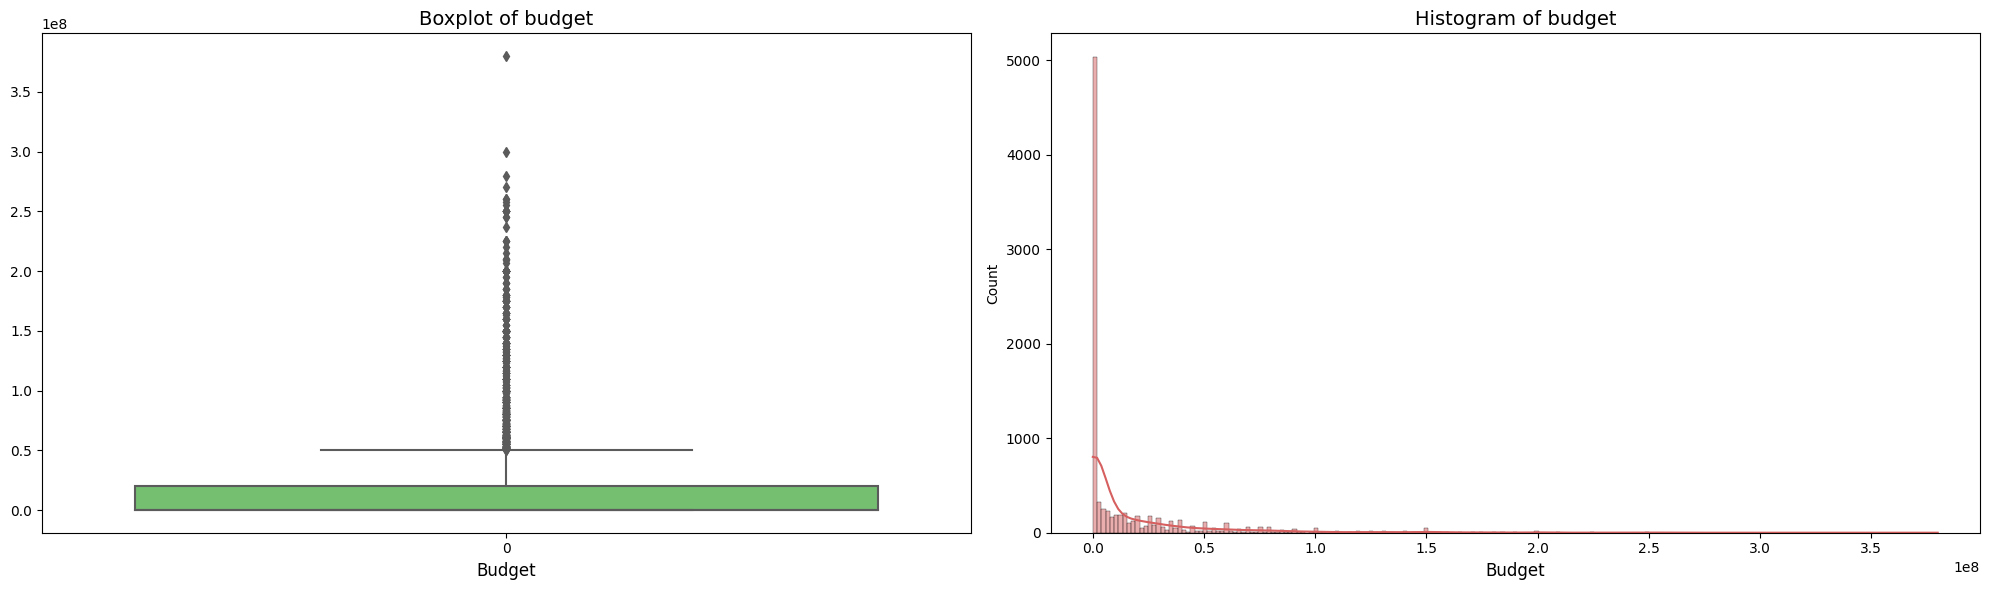

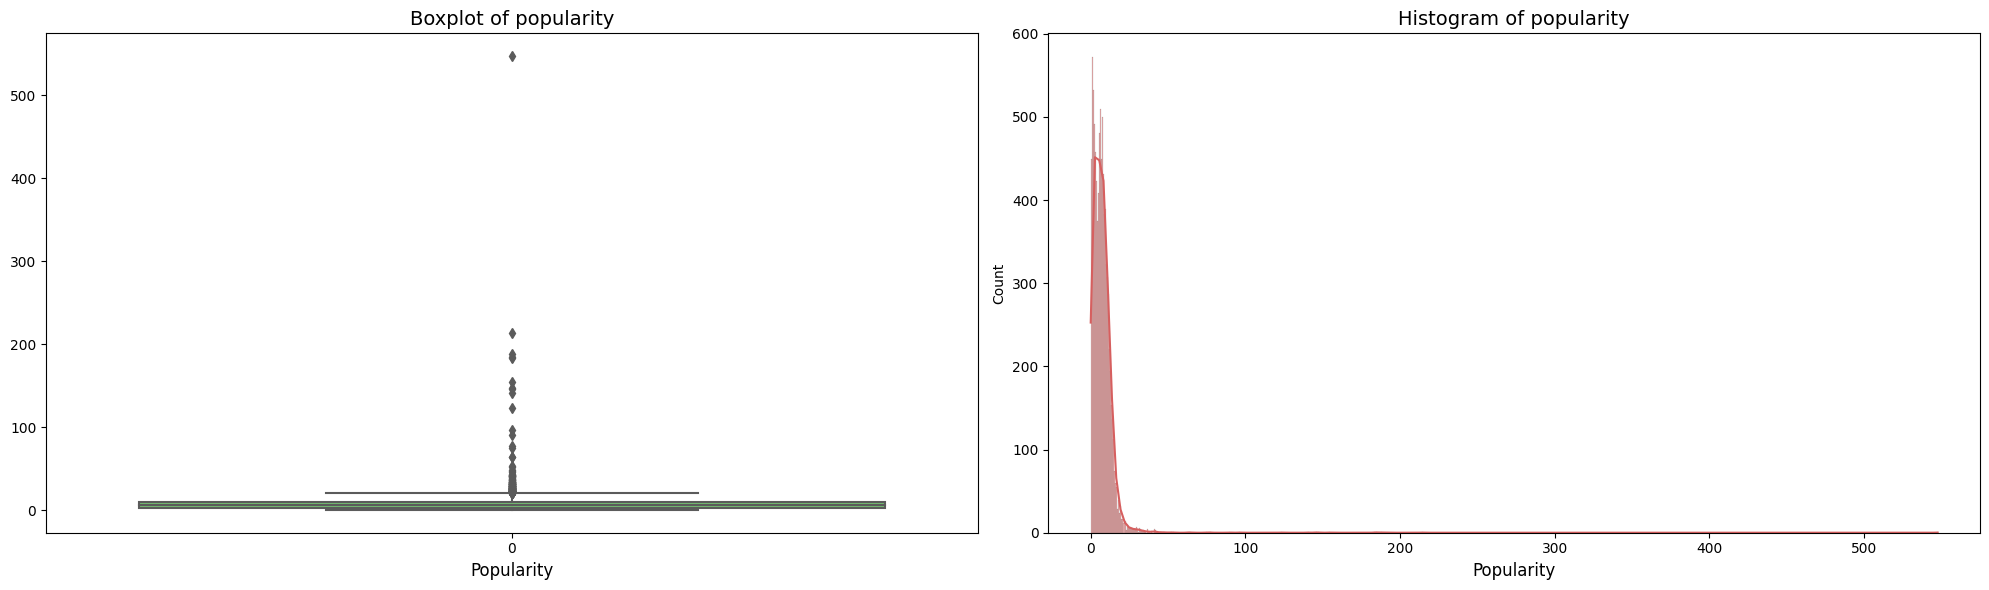

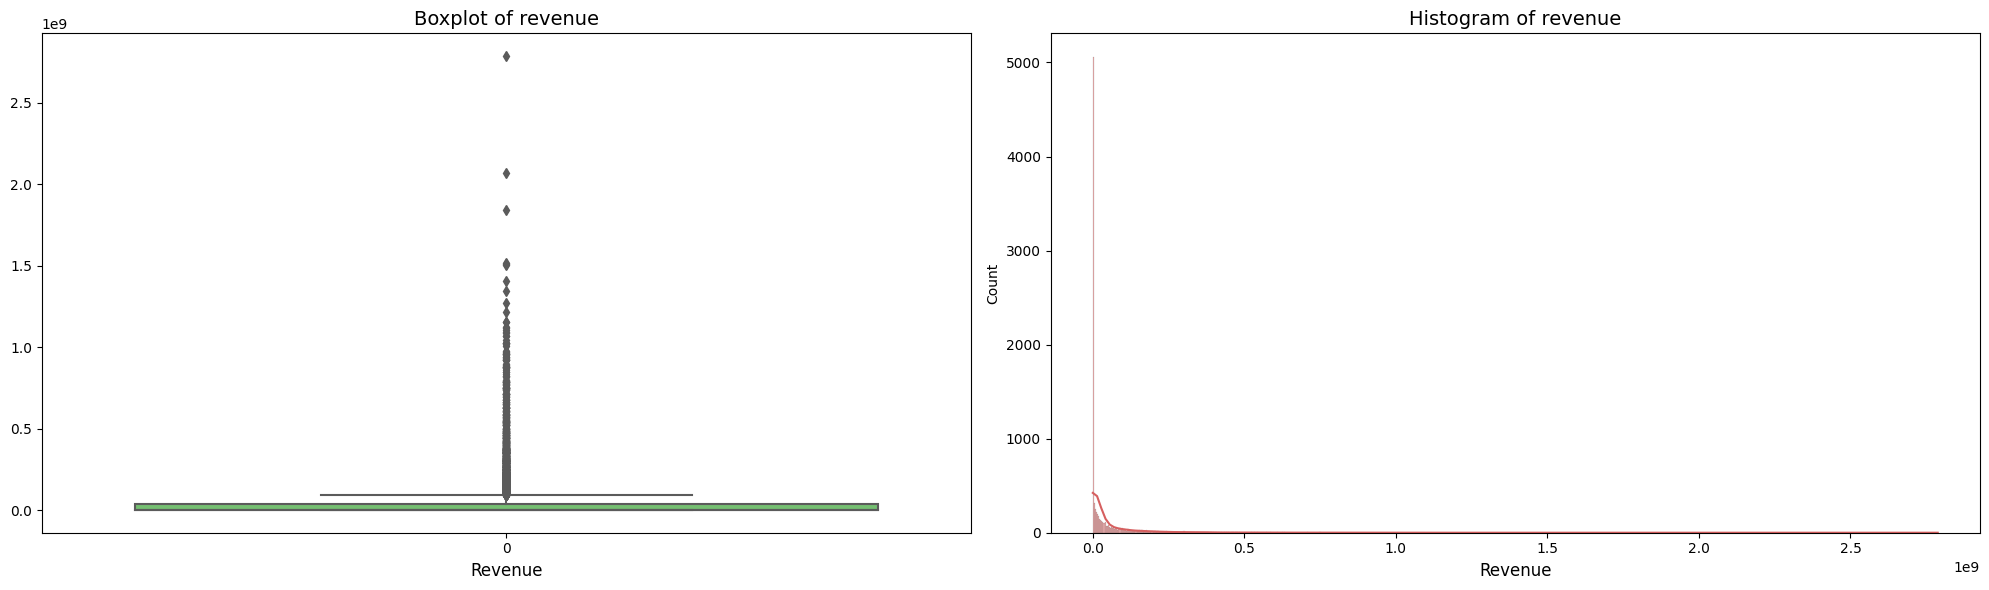

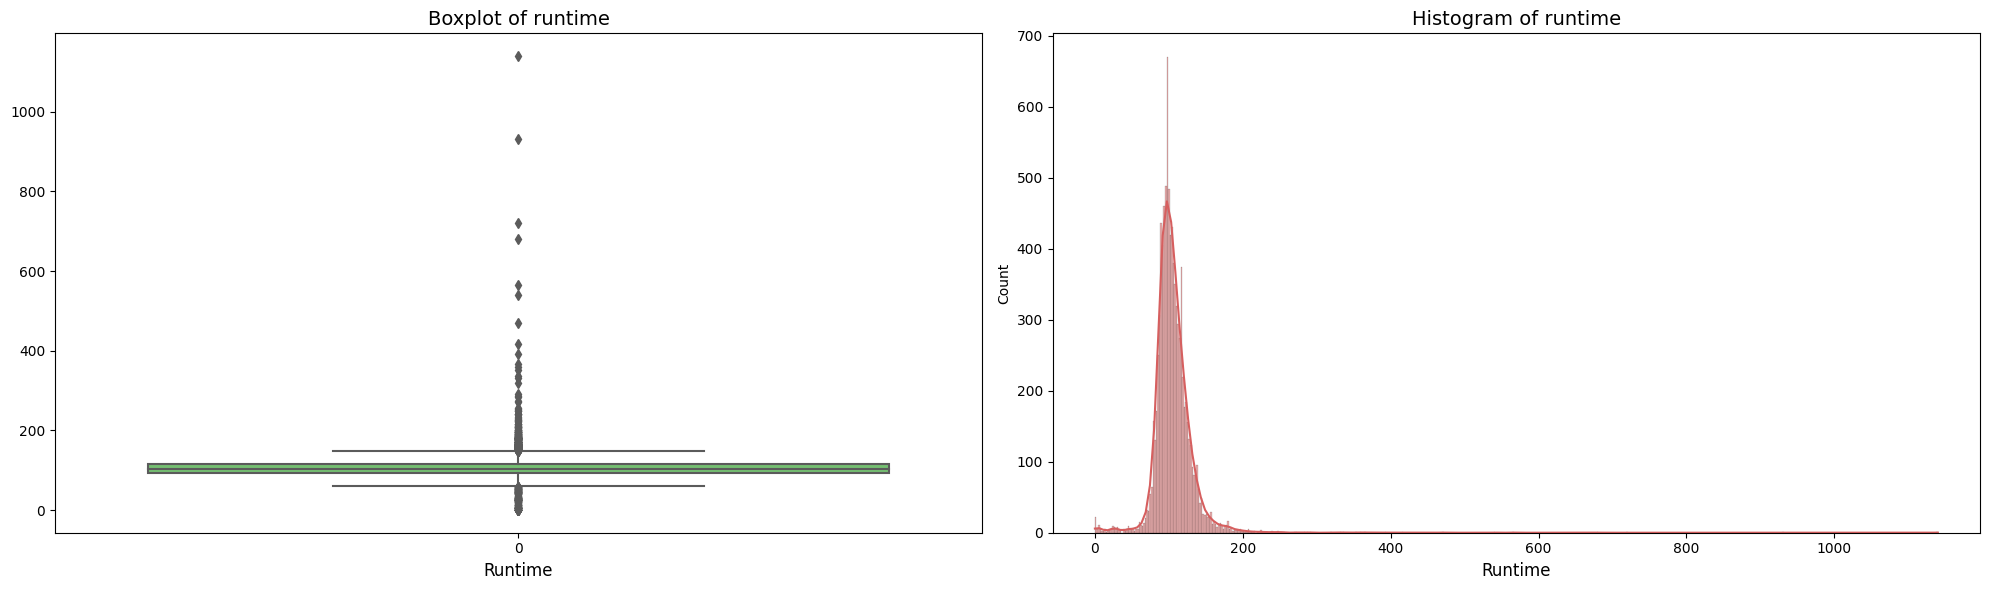

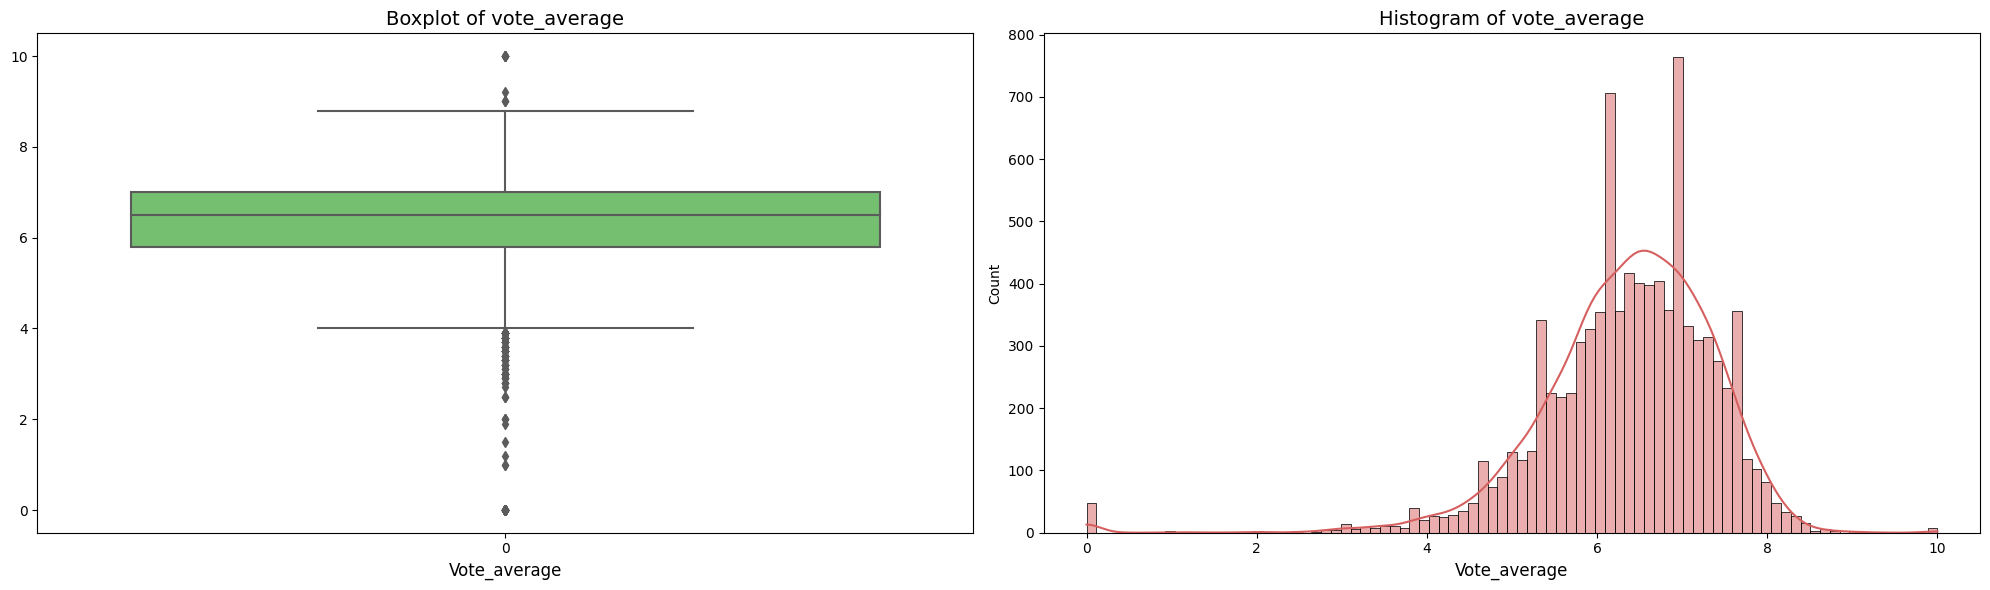

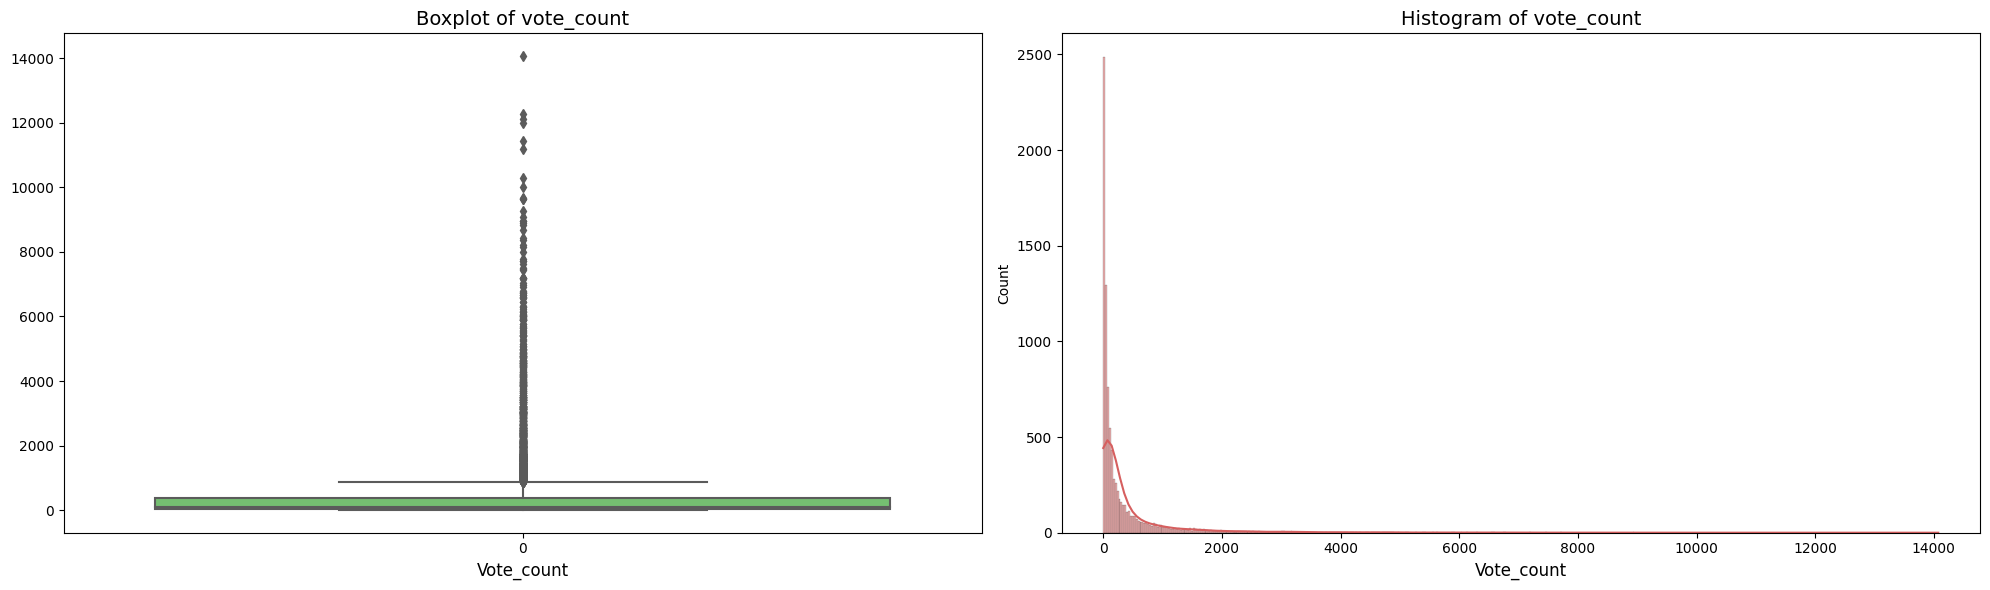

In [ ]:
def plot_column_distribution(df, column_name, color_palette='muted'):
    # Convert the column to numeric and drop NaN values
    column_data = pd.to_numeric(df[column_name], errors='coerce').dropna()

    # Set up the matplotlib figure
    fig, axs = plt.subplots(1,2 , figsize=(20, 6))

    # Boxplot
    sns.boxplot(column_data, ax=axs[0], color=sns.color_palette(color_palette)[2])
    axs[0].set_title(f"Boxplot of {column_name}", fontsize=14)
    axs[0].set_xlabel(column_name.capitalize(), fontsize=12)

    # Histogram
    sns.histplot(column_data, ax=axs[1], color=sns.color_palette(color_palette)[3], kde=True)
    axs[1].set_title(f"Histogram of {column_name}", fontsize=14)
    axs[1].set_xlabel(column_name.capitalize(), fontsize=12)

    # Adjust layout
    plt.tight_layout()

    # Show the plots
    plt.show()

columns_to_plot = ['budget', 'popularity', 'revenue', 'runtime', 'vote_average', 'vote_count']

for column in columns_to_plot:
    plot_column_distribution(metadata, column)

### Number of Films in Every Year for the 5 Most Popular Genres
From the year 1915 to 1990, we can see that the number of films from the 5 most poopular genres are generally increasing. Furthermore, there is a large increase in Drama and Comedy Films watched from 1990 to around 1995. However, films from these 5 genres gradually decreases after year 2000.

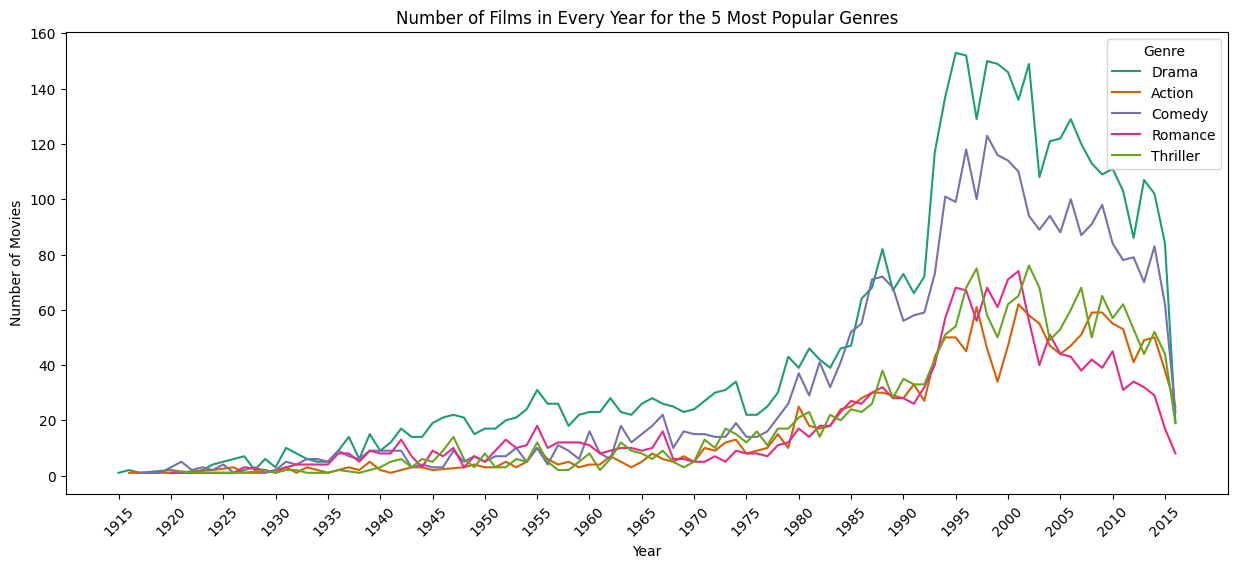

In [ ]:
# Assuming each entry in 'genres' is a list of dictionaries like [{'name': 'GenreName'}]
metadata['genres'] = metadata['genres'].apply(lambda x: [d['name'] for d in x] if isinstance(x, list) else [])

# Assuming 'release_date' is in a format like 'YYYY-MM-DD'
# If the format is different, adjust the code accordingly
metadata['year'] = pd.to_datetime(metadata['release_date'], errors='coerce').dt.year

# Convert 'year' to an integer type
metadata['year'] = metadata['year'].astype(int)

# Explode the DataFrame on 'genres'
df_exploded = metadata.explode('genres')

# Count the occurrences of each genre
genre_counts = df_exploded['genres'].value_counts()

# Create a list of genres sorted by their frequency
sort_gen_list = genre_counts.index.tolist()

# Filter the genres to the top 5 most popular ones
top_genres = sort_gen_list[:5]
df_filtered = df_exploded[df_exploded['genres'].isin(top_genres)]

# Group by year and genre, then count the number of films
df_grouped = df_filtered.groupby(['year', 'genres']).size().reset_index(name='film_count')

# Plotting
plt.figure(figsize=(15, 6))
sns.lineplot(x='year', y='film_count', hue='genres', data=df_grouped, linewidth=1.5, palette='Dark2')

plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.title('Number of Films in Every Year for the 5 Most Popular Genres')
plt.xticks(rotation=45)
plt.xticks(np.arange(min(df_grouped['year']), max(df_grouped['year'])+1, 5.0))
plt.legend(title='Genre')

plt.show()

# EDA for Categorical Variables and Words

### Most Frequent Words in the Title
We can see that Man, Love, Day are some of the most frequent words in movie titles.

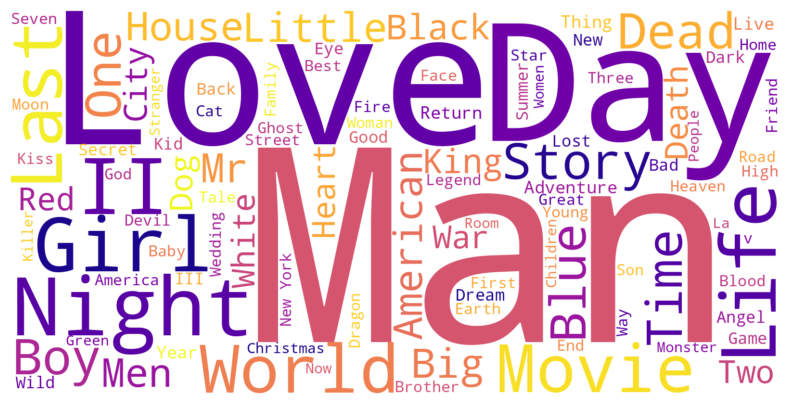

In [ ]:
text_title = ' '.join(metadata['title'])
wordcloud = WordCloud(background_color='white', width=800, height=400, max_words=100, scale=2.0, colormap='plasma').generate(text_title)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### Most Frequent Keywords
Words like independent, woman, director, film, love, are some of the more frequent keywords.

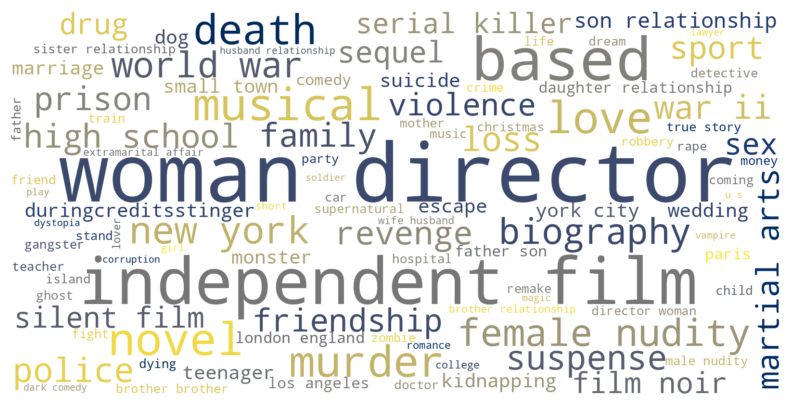

In [ ]:
def extract_keywords(row):
    if isinstance(row, list):
        return ' '.join([keyword['name'] for keyword in row if 'name' in keyword])
    else:
        return ''

keywords['extracted_keywords'] = keywords['keywords'].apply(extract_keywords)
text_title = ' '.join(keywords['extracted_keywords'])
wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', width=800, height=400, max_words=100, scale=2.0, colormap='cividis').generate(text_title)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### Distribution of Categorical Variables
From the barcharts below, we can see that all of the movies are not adult films, mostly in english, have been released, and not a video.

In [ ]:
distinct_categories_adult = metadata['adult'].unique().tolist()
print("Distinct Categories of adult:", distinct_categories_adult, '\n')

distinct_categories_original_language = metadata['original_language'].unique().tolist()
print("Distinct Categories of original language:", distinct_categories_original_language, '\n')

distinct_categories_status = metadata['status'].unique().tolist()
print("Distinct Categories of status:", distinct_categories_status, '\n')

distinct_categories_video = metadata['video'].unique().tolist()
print("Distinct Categories of video:", distinct_categories_video, '\n')

Distinct Categories of adult: ['False'] 

Distinct Categories of original language: ['en', 'ja', 'it', 'es', 'pt', 'fr', 'zh', 'el', 'ko', 'sr', 'de', 'sv', 'cn', 'cs', 'hu', 'ru', 'nl', 'hi', 'id', 'fa', 'da', 'ro', 'pl', 'he', 'th', 'xx', 'no', 'fi', 'is', 'nb', 'af', 'ar', 'bs', 'et', 'bn', 'tr', 'uk', 'ps', 'vi', 'lo', 'sk', 'bo'] 

Distinct Categories of status: ['Released', 'Rumored', 'Post Production', 'In Production', nan] 

Distinct Categories of video: [False, True] 



Text(0.5, 1.0, 'Barchart of adult')

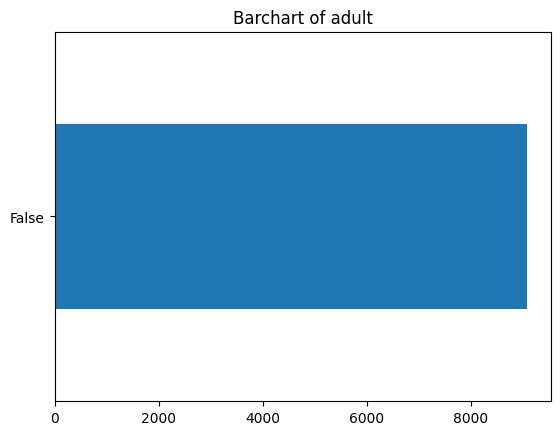

In [ ]:
metadata['adult'].value_counts().plot(kind='barh').set_title("Barchart of adult")

Text(0.5, 1.0, 'Barchart of original language')

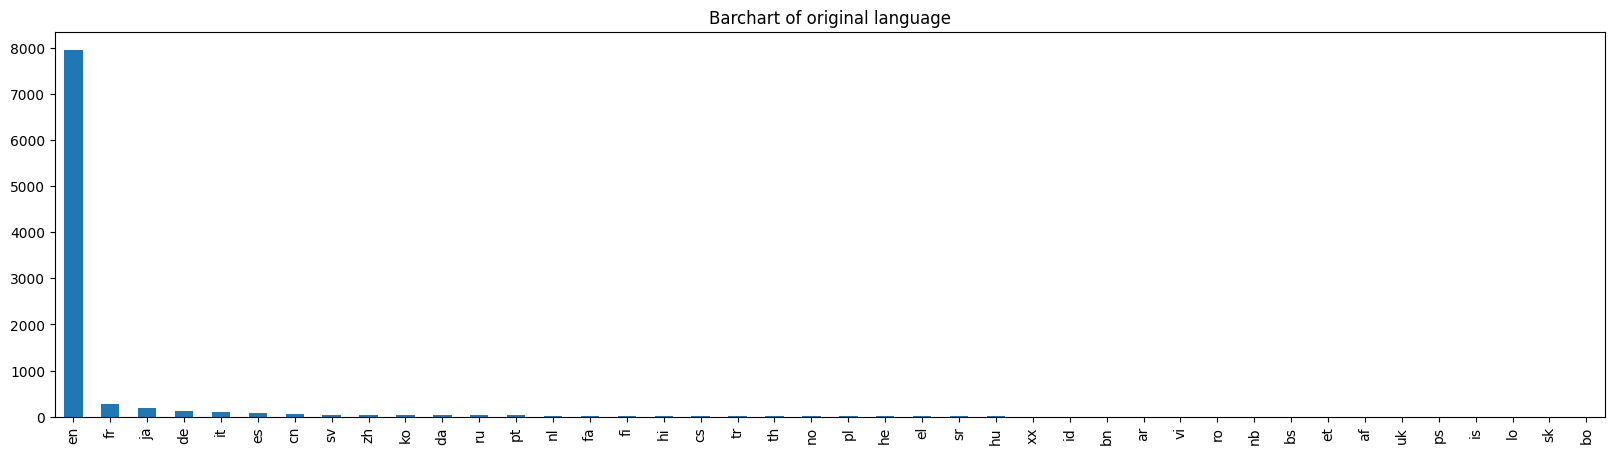

In [ ]:
plt.subplots(figsize=(20, 5))
metadata['original_language'].value_counts().plot(kind='bar').set_title("Barchart of original language")

Text(0.5, 1.0, 'Barchart of video')

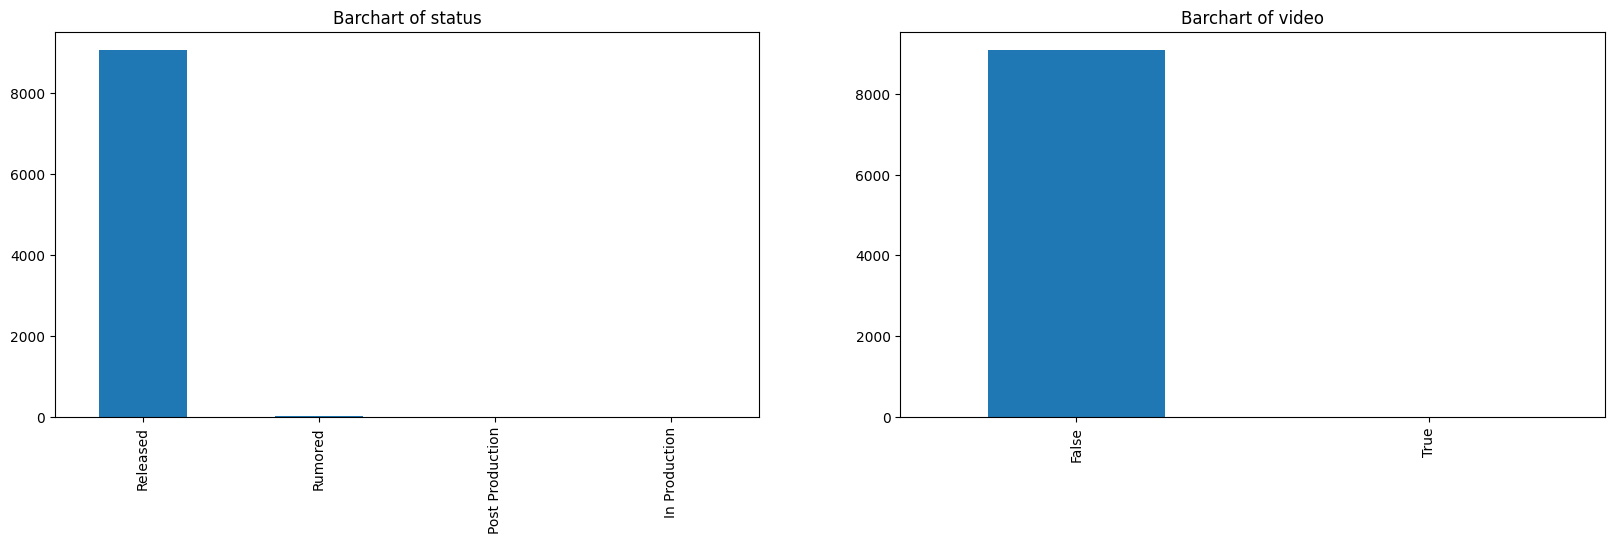

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(20, 5))
metadata['status'].value_counts().plot(kind='bar', ax=axs[0]).set_title("Barchart of status")
metadata['video'].value_counts().plot(kind='bar', ax=axs[1]).set_title("Barchart of video")
